## Oceanbolt Python SDK - International trade of Chinese flagged Supramax fleet

Example of Oceanbolt's Python SDK to answer the question - "What is the percentage of the Chinese flagged Supramax fleet that is currently trading internationally and how has this changed throughout 2020?"


In [7]:
# Import the relevant libraries
# In order to get a timeseries number of Chinese flagged Supramax vessels, we use the ChineseWatersTimeseries client (https://python-sdk.oceanbolt.com/tonnage_v3/chinese_waters.html)

from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.data.tonnage import ChineseWatersTimeseries
from datetime import date

In [8]:
# Create the base API client using your token. Tokens can be created in the Oceanbolt App (app.oceanbolt.com)
base_client = APIClient("<token>")

In [9]:
# Connect to the relevant Oceanbolt data endpoints using the base client object, ie: ChineseWatersTimeseries
chinese_waters_client = ChineseWatersTimeseries(base_client)

In [10]:
# We apply filters to our query to get the timeseries Chinese flagged Supramax fleet and its trading activities
# A complete list of available filters can be found at https://python-sdk.oceanbolt.com/tonnage_v3/chinese_waters.html#arguments

df = chinese_waters_client.get(
   segment=['supramax'],
    start_date=date(2020, 1, 1), 
    end_date=date(2020, 12, 31),
)

#Print 2 first rows of table
df.head(2) 

,date,inside_chinese_waters_count,inside_chinese_waters_dwt,outside_chinese_waters_count,outside_chinese_waters_dwt
0,2020-01-01,161,8583539,28,1530294
1,2020-01-02,160,8539107,29,1574726


In [11]:
#In order to get the percentage of the fleet that is engaged in international trade, we do some further manipulation
#If you find you are doing repetitive data manipulations, give us a shout at info@oceanbolt.com and we will look at including your desired metrics directly in the response

#Sum vessel counts to get the total Chinese flagged Supramax fleet
total_fleet = df["inside_chinese_waters_count"] + df["outside_chinese_waters_count"]
df['total_fleet'] = total_fleet
#Calculate percentage trading outside of China
percentage_outside_china = df["outside_chinese_waters_count"] / df['total_fleet']
df['percentage_outside_china'] = percentage_outside_china

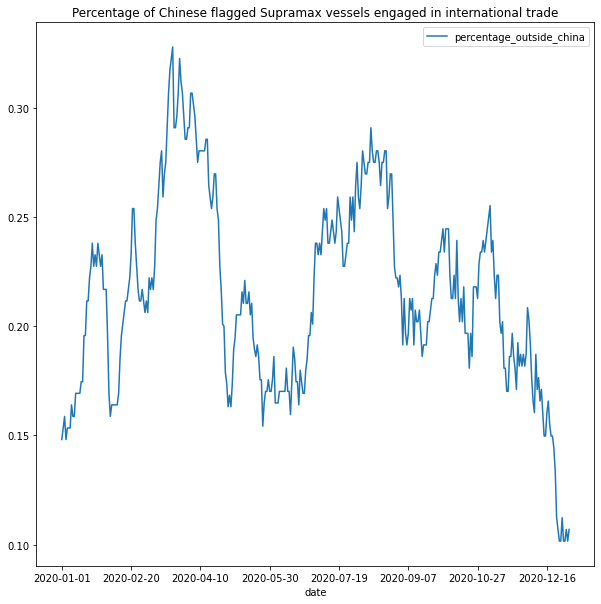

In [12]:
#Let's plot the timeseries
df.plot(x='date', y='percentage_outside_china', figsize=(10,10), title='Percentage of Chinese flagged Supramax vessels engaged in international trade');